# Program Visualisasi Data
_Daftar Nama dan Jenis Kelamin Masyarakat Indonesia_

**Kontributor:**
- Dimas Reza Ardhana (3124600102)
- Erik Triayuda Wijaya (3124600094)

Program dibuat menggunakan bahasa **Python v3.14.0** dan menggunakan library / depedency:
- `pandas` untuk manipulasi data & data frame.
- `matplotlib` membuat visualisasi diagram.
- `seaborn` bar plots untuk matplot.
- `numpy` multi-dimentional array.

Program menggunakan Jupyter Notebook untuk mempermudah eksekusi dan pembacaan.

Konsep program:
- Kode (line 1)
- Output (line 2)

#### Cara Menjalankan Program
1. Jalankan blok kode installasi, import, dan variable definition, atau
2. Klik `Run All` atau `Execute Cell` di sebelah kiri blok kode.

In [ ]:

# JALANKAN BLOK INI TERLEBIH DAHULU SEBELUM YANG LAIN

# Instalasi ke-empat paket yang digunakan
%pip install pandas matplotlib seaborn numpy

# Mengimport paket sebagai variabel untuk digunakan dalam data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Membaca file sumber: indonesian-names.csv
df = pd.read_csv("indonesian-names.csv")

In [7]:
# Memfilter/membersihkan data lalu melihat apakah data telah terbaca dengan benar
df = (
    df
    .dropna()
    .drop_duplicates()
)
df = df.select_dtypes(include='object')

df

,Nama,Jenis_Kelamin
0,hafizhan shidqi,m
1,gandhi wibowo,m
2,aldio mahendra purwandrarto,m
3,benny putra,m
4,vicky vernando dasta,m
...,...,...
1955,hadimah,f
1956,aprillia rahma wati,f
1957,muhamad khoirunisa. m,m
1958,sukandi,m


# Distribusi Nama Berdasarkan Kelamin

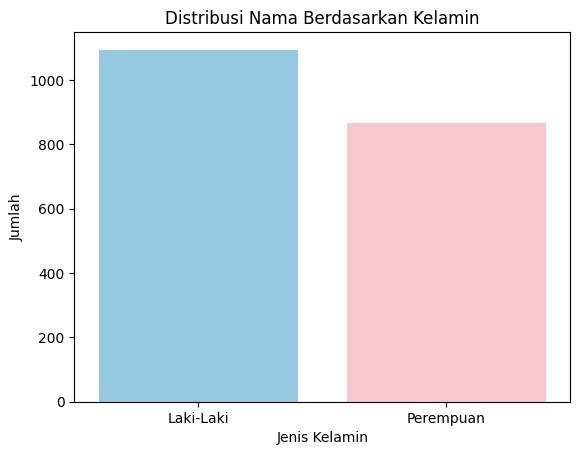

In [ ]:
# Mengganti inisial menjadi kata
df['Jenis_Kelamin'] = df['Jenis_Kelamin'].replace({'m': 'Laki-Laki', 'f': 'Perempuan'})

sns.countplot(
    x='Jenis_Kelamin', 
    data=df,
    palette={'Laki-Laki':'skyblue','Perempuan':'pink'},
    hue='Jenis_Kelamin',
    legend=False
)

plt.title('Distribusi Nama Berdasarkan Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')

plt.show()

## Frekuensi Banyak Kata dalam Sebuah Nama

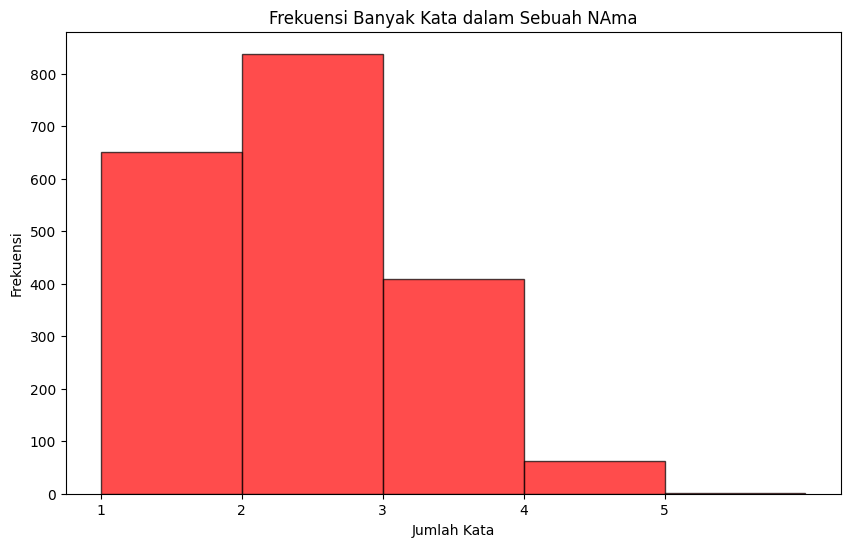

In [ ]:
df['Word_Count'] = df['Nama'].astype(str).str.split().apply(len)

plt.figure(figsize=(10, 6))
plt.hist(df['Word_Count'], bins=range(1, df['Word_Count'].max() + 2), color='red', edgecolor='black', alpha=0.7)

plt.title('Frekuensi Banyak Kata dalam Sebuah NAma')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')

plt.xticks(range(1, df['Word_Count'].max() + 1))
plt.show()

### Nama dengan Frekuensi Paling Sering 
#### (Bentuk Tabel)

In [17]:
nama_split = df['Nama'].astype(str).str.split()

df['First_Name'] = nama_split.str[0].str.title()
df['Last_Name']  = nama_split.str[1].where(nama_split.str.len() >= 2).str.title() 

# M=muhammad
df['First_Name']=df['First_Name'].replace('M.','Muhammad')

# Data frame frekuensi nama awal
first_name_freq = df['First_Name'].value_counts().reset_index()
first_name_freq.columns = ['First_Name', 'Frekuensi']

# Data frame frekuensi nama akhir
last_name_freq = df['Last_Name'].value_counts().reset_index()
last_name_freq.columns = ['Last_Name', 'Frekuensi']

print("Top 10 Nama Paling Sering")
first_name_freq.head(10)

Top 10 Nama Paling Sering


,First_Name,Frekuensi
0,Muhammad,88
1,Siti,40
2,Ahmad,28
3,Sri,18
4,Nur,16
5,Tri,16
6,Dewi,15
7,Slamet,11
8,Eka,9
9,Agus,9


#### (Bentuk Chart)

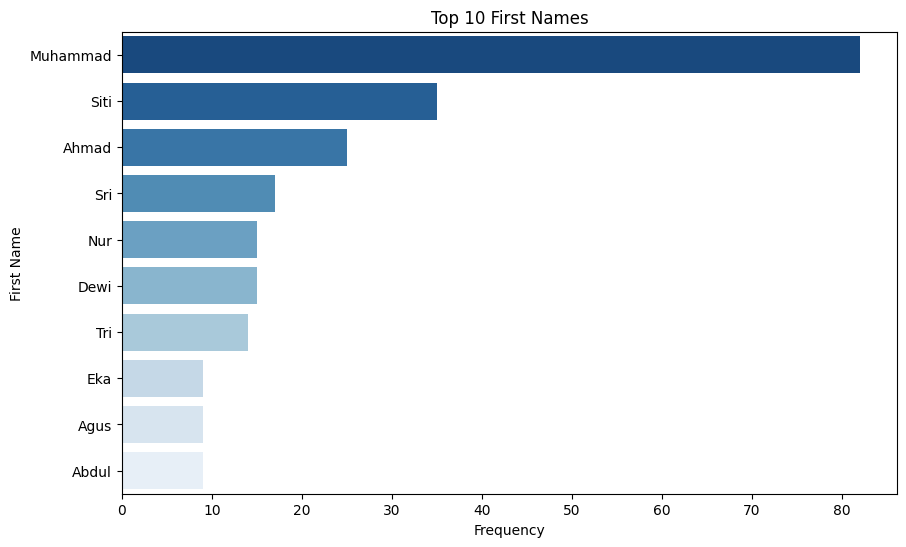

In [ ]:
# Bar chart for First Name
plt.figure(figsize=(10, 6))
sns.barplot(x='Frekuensi', y='First_Name', data=first_name_freq.head(10),hue='First_Name', palette='Blues_r')

plt.title('Top 10 First Names')
plt.xlabel('Frekuensi')
plt.ylabel('Kata Pertama')

plt.show()

### Nama Akhir dengan Frekuensi Paling Sering

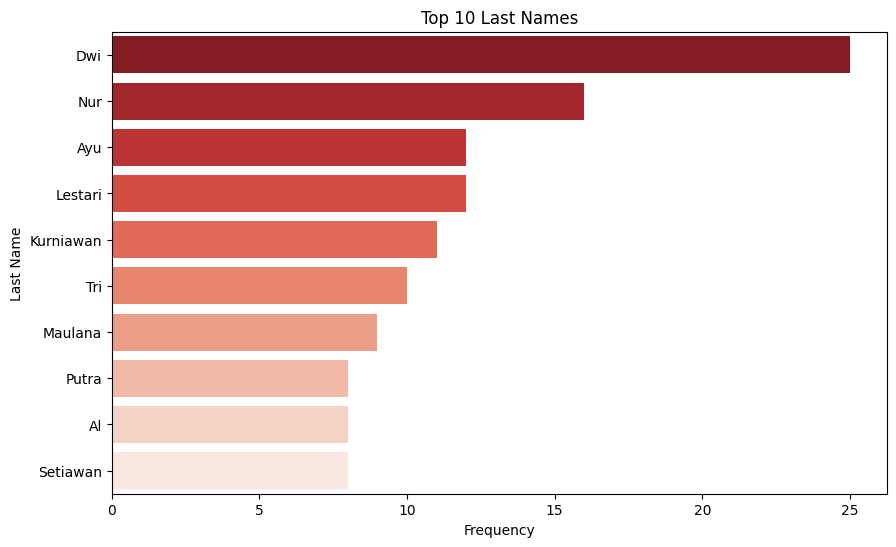

In [66]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Frekuensi', y='Last_Name', data=last_name_freq.head(10),hue='Last_Name', palette='Reds_r')

plt.title('Top 10 Nama Akhir Paling Sering')
plt.xlabel('Frekuensi')
plt.ylabel('Nama Akhir')

plt.show()

### Berdasarkan Jenis Kelamin Laki-Laki

In [67]:

male_data = df[df['Jenis_Kelamin'] == 'm']
female_data = df[df['Jenis_Kelamin'] == 'f']

male_first_name_freq = male_data['First_Name'].value_counts().reset_index().head(10)
male_first_name_freq.columns = ['First_Name', 'Frekuensi']

female_first_name_freq = female_data['First_Name'].value_counts().reset_index().head(10)
female_first_name_freq.columns = ['First_Name', 'Frekuensi']


male_last_name_freq = male_data['Last_Name'].value_counts().reset_index().head(10)
male_last_name_freq.columns = ['Last_Name', 'Frekuensi']

female_last_name_freq = female_data['Last_Name'].value_counts().reset_index().head(10)
female_last_name_freq.columns = ['Last_Name', 'Frekuensi']

<h3>Nama awal</h3>

<h3>laki-laki</h3>

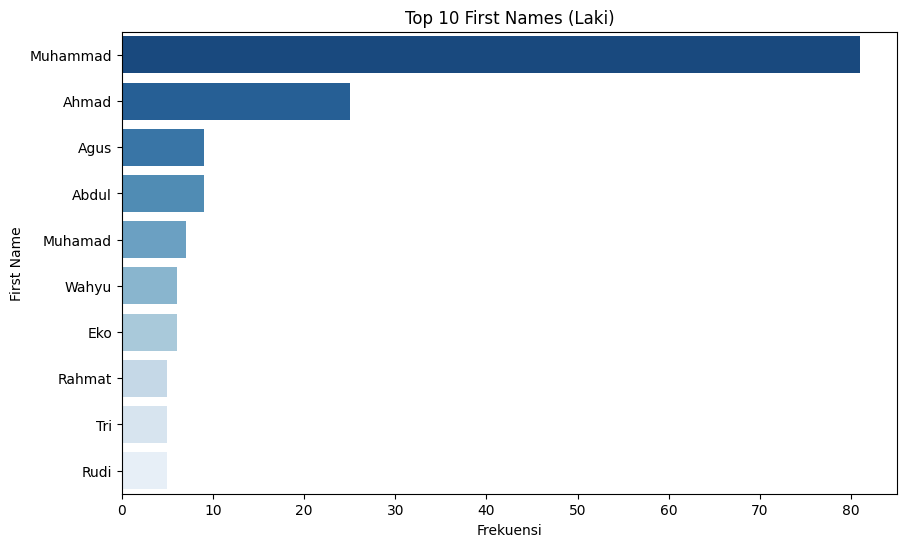

In [68]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Frekuensi', y='First_Name', data=male_first_name_freq,hue='First_Name', palette='Blues_r')
plt.title('Top 10 First Names (Laki)')
plt.xlabel('Frekuensi')
plt.ylabel('First Name')
plt.show()

<h3>perempuan</h3>

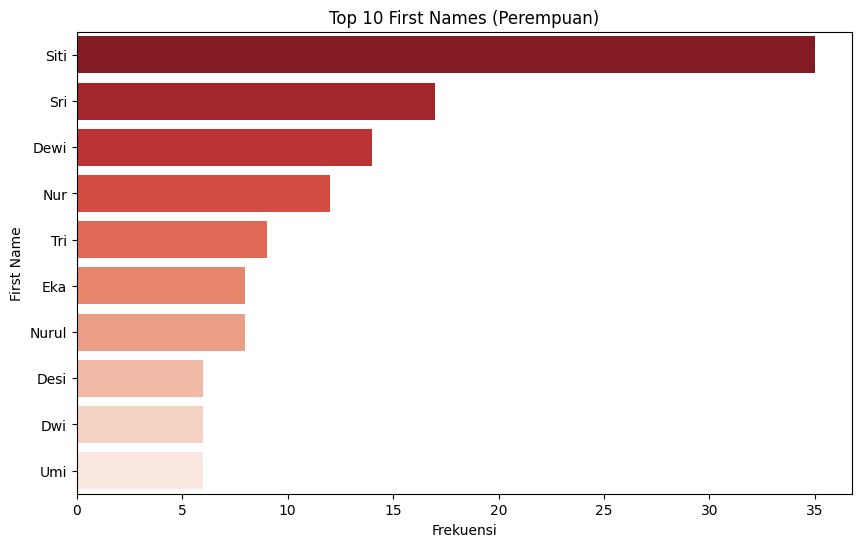

In [69]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Frekuensi', y='First_Name', data=female_first_name_freq,hue='First_Name', palette='Reds_r')
plt.title('Top 10 First Names (Perempuan)')
plt.xlabel('Frekuensi')
plt.ylabel('First Name')
plt.show()

<h3>Nama akhir</h3>

<h3>Laki-Laki</h3>

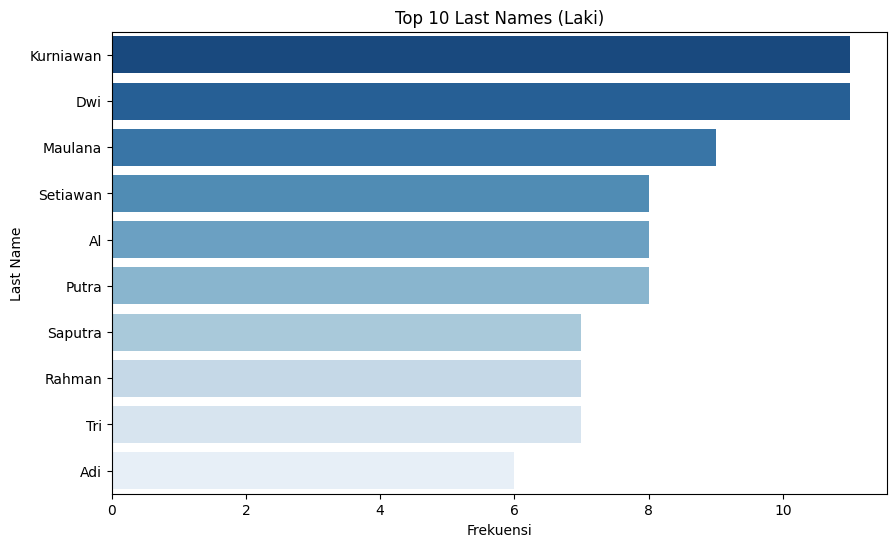

In [70]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Frekuensi', y='Last_Name', data=male_last_name_freq,hue='Last_Name', palette='Blues_r')
plt.title('Top 10 Last Names (Laki)')
plt.xlabel('Frekuensi')
plt.ylabel('Last Name')
plt.show()

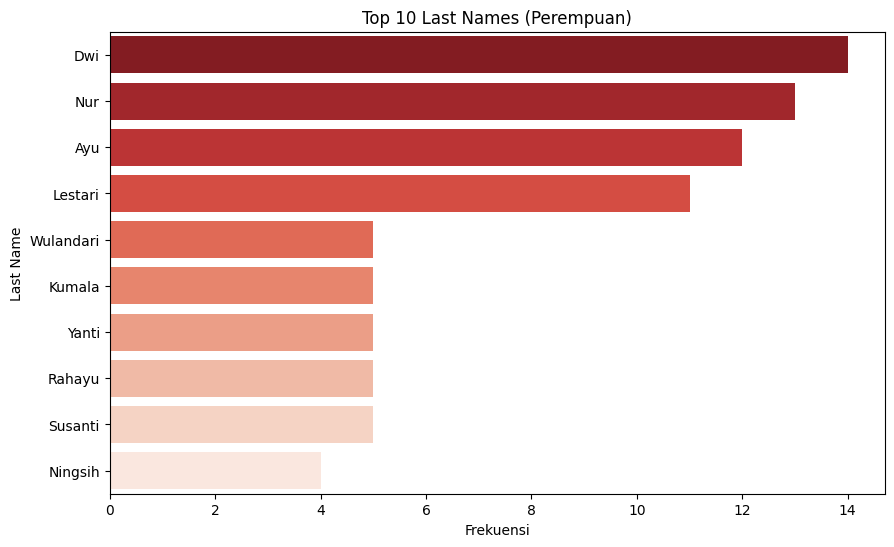

In [71]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Frekuensi', y='Last_Name', data=female_last_name_freq,hue='Last_Name', palette='Reds_r')
plt.title('Top 10 Last Names (Perempuan)')
plt.xlabel('Frekuensi')
plt.ylabel('Last Name')
plt.show()

<h1>panjang nama</h1>

In [72]:
df["panjang_nama"]=df["Nama"].str.len()
df

,Nama,Jenis_Kelamin,Word_Count,First_Name,Last_Name,panjang_nama
0,hafizhan shidqi,m,2,Hafizhan,Shidqi,15
1,gandhi wibowo,m,2,Gandhi,Wibowo,13
2,aldio mahendra purwandrarto,m,3,Aldio,Mahendra,27
3,benny putra,m,2,Benny,Putra,11
4,vicky vernando dasta,m,3,Vicky,Vernando,20
...,...,...,...,...,...,...
1955,hadimah,f,1,Hadimah,NaN,7
1956,aprillia rahma wati,f,3,Aprillia,Rahma,19
1957,muhamad khoirunisa. m,m,3,Muhamad,Khoirunisa.,21
1958,sukandi,m,1,Sukandi,NaN,7


<h3>distribusi panjang nama</h3>

In [73]:
average=(df["panjang_nama"]).mean()
std_dev=df["panjang_nama"].std()
size=df["panjang_nama"].count()
df_stat=pd.DataFrame({
    "mean":[average],
    "std_dev":[std_dev],
    "size":[size]
})
df_stat

,mean,std_dev,size
0,12.773385,5.085715,1796


<h3>distribusi normal panjang nama</h3>

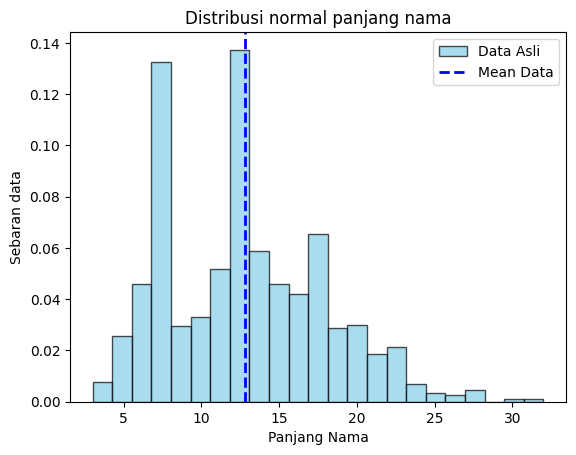

In [74]:
plt.hist(df["panjang_nama"], 
         bins='auto', density=True,
         alpha=0.7, color='skyblue', edgecolor='black', label='Data Asli')
plt.axvline(average, color='blue', linestyle='dashed', linewidth=2, label='Mean Data')
plt.title("Distribusi normal panjang nama")
plt.xlabel("Panjang Nama")
plt.ylabel("Sebaran data")
plt.legend()
plt.show()

<h3>distibusi normal panjang nama theoretical vs data</h3>

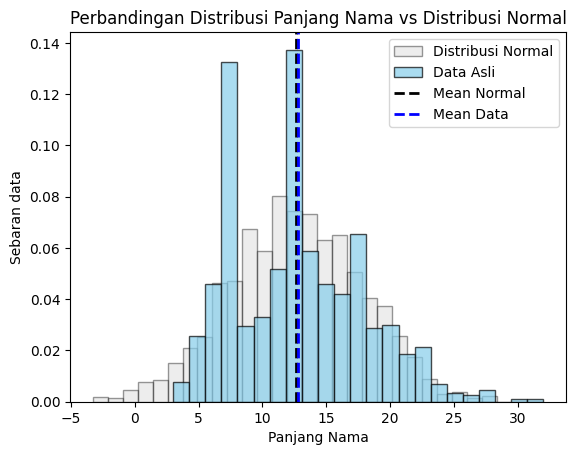

In [75]:
# Theoretical data
normal_dist = np.random.normal(average, std_dev, size)

# overlay
plt.hist(normal_dist, 
         bins='auto', density=True,
         color='lightgray', edgecolor='black', alpha=0.4, label='Distribusi Normal')

plt.hist(df["panjang_nama"], 
         bins='auto', density=True,
         alpha=0.7, color='skyblue', edgecolor='black', label='Data Asli')

# mean
plt.axvline(normal_dist.mean(), color='black', linestyle='dashed', linewidth=2, label='Mean Normal')
plt.axvline(average, color='blue', linestyle='dashed', linewidth=2, label='Mean Data')

# Labels and legend
plt.title("Perbandingan Distribusi Panjang Nama vs Distribusi Normal")
plt.xlabel("Panjang Nama")
plt.ylabel("Sebaran data")
plt.legend()
plt.show()

<h2>panjang nama laki-laki</h2>

<h3>distribusi normal panjang nama laki-laki</h3>

<h2>panjang nama perempuan</h2>

<h3>distribusi normal panjang nama perempuan</h3>